# Rotation of the sky map

In [150]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from scipy.special import sph_harm_y
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib widget
%matplotlib inline


In [151]:
np.random.seed(62)

In [152]:
# Define HEALPix resolution
nside = 32  # Set a suitable Nside value (a power of 2)
npix = hp.nside2npix(nside)

# # Generate theta and phi for pixel centers
theta, phi = hp.pix2ang(nside, np.arange(npix))

# Create a complex-valued map (example map, you could replace it with your own)
sphere_f = np.zeros(npix, dtype=np.complex128)

# Set max_l for spherical harmonics
max_l = 10

theta2 = np.linspace(0, 2 * np.pi, 200)  # Azimuthal angle
phi2 = np.linspace(0, np.pi, 100)        # Polar angle
theta2, phi2 = np.meshgrid(theta2, phi2)


k = 0
sphere_f_grid = []
l_m = []

for i in range(3):
    l = i + 4 #int(np.random.normal(max_l, max_l-3))
    m = int(np.random.normal(0,l))#int(np.random.normal(max_l-2, max_l-4))
    # m = l - 2
    # l, m = abs(l), abs(m)
    
    if abs(l)>=abs(m):
        # Compute spherical harmonics
        Y_lm = sph_harm_y(l, m, theta, phi)
        # print(l, m)
        # print(Y_lm)
        Y_lm2 = sph_harm_y(l, m, theta2, phi2)
        if k == 0:
            sphere_f += Y_lm
            sphere_f_grid.append(np.array(Y_lm2))
            sphere_f_grid = np.array(sphere_f_grid[0])
            k = 1
            l_m.append((l,m))
        else:
            sphere_f += Y_lm
            sphere_f_grid += np.array(Y_lm2)
            l_m.append((l,m))


print(l_m)

[(4, 0), (5, -2), (6, -1)]


1935 12288


<Figure size 640x480 with 0 Axes>

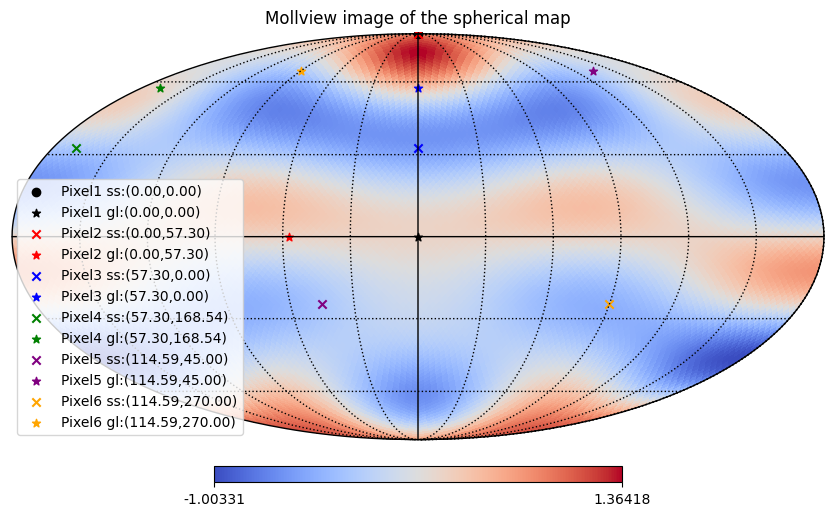

In [153]:

# Set seed for reproducibility seed = 36
np.random.seed(37)
n1 = np.random.randint(hp.nside2npix(nside))
print(n1, hp.nside2npix(nside))

# Convert the pixel index to spherical coordinates (theta, phi)
theta1, phi1 = hp.pix2ang(nside, n1)

theta1, phi1 = 0, 0
theta2, phi2 = 0, 1 
theta3, phi3 = 1, 0
theta4, phi4 = 1, np.pi -0.2
theta5, phi5 = 2, 0.25*np.pi
theta6, phi6 = 2, 1.5*np.pi

sky_map = sphere_f.real

# Plot the map
plt.figure()
hp.mollview(sky_map, title='Mollview image of the spherical map', cmap='coolwarm', xsize=2000)
hp.graticule()
hp.projscatter(theta1, phi1, marker='o', lonlat=False, color='black', label=f'Pixel1 ss:({np.rad2deg(theta1):.2f},{ np.rad2deg(phi1):.2f})')
hp.projscatter( np.rad2deg(phi1), np.rad2deg(theta1), marker ='*', lonlat=True, color='black', label=f'Pixel1 gl:({np.rad2deg(theta1):.2f},{ np.rad2deg(phi1):.2f})')
hp.projscatter(theta2, phi2, marker='x', lonlat=False, color='red', label=f'Pixel2 ss:({np.rad2deg(theta2):.2f},{ np.rad2deg(phi2):.2f})')
hp.projscatter( np.rad2deg(phi2), np.rad2deg(theta2), marker ='*', lonlat=True, color='red', label=f'Pixel2 gl:({np.rad2deg(theta2):.2f},{ np.rad2deg(phi2):.2f})')
hp.projscatter(theta3, phi3, marker='x', lonlat=False, color='blue', label=f'Pixel3 ss:({np.rad2deg(theta3):.2f},{ np.rad2deg(phi3):.2f})')
hp.projscatter( np.rad2deg(phi3), np.rad2deg(theta3), marker ='*', lonlat=True, color='blue', label=f'Pixel3 gl:({np.rad2deg(theta3):.2f},{ np.rad2deg(phi3):.2f})')
hp.projscatter(theta4, phi4, marker='x', lonlat=False, color='green', label=f'Pixel4 ss:({np.rad2deg(theta4):.2f},{ np.rad2deg(phi4):.2f})')
hp.projscatter( np.rad2deg(phi4), np.rad2deg(theta4), marker ='*', lonlat=True, color='green', label=f'Pixel4 gl:({np.rad2deg(theta4):.2f},{ np.rad2deg(phi4):.2f})')
hp.projscatter(theta5, phi5, marker='x', lonlat=False, color='purple', label=f'Pixel5 ss:({np.rad2deg(theta5):.2f},{ np.rad2deg(phi5):.2f})')
hp.projscatter( np.rad2deg(phi5), np.rad2deg(theta5), marker ='*', lonlat=True, color='purple', label=f'Pixel5 gl:({np.rad2deg(theta5):.2f},{ np.rad2deg(phi5):.2f})')
hp.projscatter(theta6, phi6, marker='x', lonlat=False, color='orange', label=f'Pixel6 ss:({np.rad2deg(theta6):.2f},{ np.rad2deg(phi6):.2f})')
hp.projscatter( np.rad2deg(phi6), np.rad2deg(theta6), marker ='*', lonlat=True, color='orange', label=f'Pixel6 gl:({np.rad2deg(theta6):.2f},{ np.rad2deg(phi6):.2f})')


plt.legend(loc='lower left')
plt.show()

# # Plot the map in 3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(np.sin(theta2) * np.cos(phi2), np.sin(theta2) * np.sin(phi2), np.cos(theta2), facecolors=plt.cm.coolwarm(sphere_f_grid.real))   
# ax.set_title('3D plot of the spherical map')
# plt.show()


In [170]:
%matplotlib inline

# Set seed for reproducibility seed = 36
np.random.seed(36) 
n1 = np.random.randint(hp.nside2npix(nside))
print(n1, hp.nside2npix(nside))
n2 = np.random.randint(hp.nside2npix(nside))
print(n2, hp.nside2npix(nside))


# Convert the pixel index to spherical coordinates (theta, phi)
theta1, phi1 = hp.pix2ang(nside, n1)
theta2, phi2 = hp.pix2ang(nside, n2)

# theta1, phi1 = 0.9, 2.9

610 12288
9118 12288


In [171]:
def inverse_rot(alpha, beta, gamma):
    alpha = -alpha
    beta = -beta
    gamma = -gamma
    return alpha, beta, gamma

In [172]:
# Define omega as -theta1
omega = -theta1

Theta = np.pi / 2
# Phi is given by the inverse tangent, but for spherical coordinates we already have it from phi1
if phi1 <= np.pi:
    Phi = np.arctan(-1/np.tan(phi1)) + np.pi 
else:
    Phi = np.arctan(-1/np.tan(phi1))

# Now calculate the Euler angles:
alpha = Phi - np.pi/2
beta = -theta1
gamma = 0 #-alpha


# Rotate the sky map using Healpy's rotator
Rotation = hp.rotator.Rotator( rot = [alpha, beta, gamma], deg =False, eulertype='ZYX')

# reverse the rotation
alpha_rev, beta_rev, gamma_rev = inverse_rot(alpha, beta, gamma)
Reverse_Rotation1 = hp.rotator.Rotator( rot = [0, beta_rev, 0], deg =False)
Reverse_Rotation2 = hp.rotator.Rotator( rot = [alpha_rev, 0, 0], deg =False)


# Rotate the sky map using Healpy's rotator
rotated_map = Rotation.rotate_map_pixel(sky_map)
# Rotate the pixelS
theta1_rot, phi1_rot = Rotation( (theta1,phi1))
theta2_rot, phi2_rot = Rotation( (theta2,phi2))
Theta_rot, Phi_rot = Rotation( (Theta,Phi))

# REVERSE THE ROTATION
Reversed_map = Reverse_Rotation2.rotate_map_pixel(Reverse_Rotation1.rotate_map_pixel(rotated_map))

Reverse_theta1, Reverse_phi1 = Reverse_Rotation2(Reverse_Rotation1( (theta1_rot, phi1_rot)))
Reverse_theta2, Reverse_phi2 = Reverse_Rotation2(Reverse_Rotation1( (theta2_rot, phi2_rot)))
Reverse_Theta, Reverse__Phi  = Reverse_Rotation2(Reverse_Rotation1( (Theta_rot, Phi_rot)))


# Print original, rotated and reversed coordinates
print(f"Theta1: {theta1:.2f}({np.rad2deg(theta1):.2f}), Phi1: {phi1:.2f}({np.rad2deg(phi1):.2f})")
print(f"Theta2: {theta2:.2f}({np.rad2deg(theta2):.2f}), Phi2: {phi2:.2f}({np.rad2deg(phi2):.2f})")

print(f"THETA: {Theta:.2f}({np.rad2deg(Theta):.2f}) , PHI: {Phi:.2f}({np.rad2deg(Phi):.2f}), Omega: {omega:.2f}({np.rad2deg(omega):.2f})\n")
print(f"Alpha: {alpha:.2f}({np.rad2deg(alpha):.2f}), Beta: {beta:.2f}({np.rad2deg(beta):.2f}), Gamma: {gamma:.2f}({np.rad2deg(gamma):.2f})\n")

print(f"Rotated Theta: {theta1_rot:.5f} rad ({np.rad2deg(theta1_rot):.2f}°), Rotated Phi: {phi1_rot:.5f} rad ({np.rad2deg(phi1_rot):.2f}°)")
print(f"Rotated theta2: {theta2_rot:.5f} rad ({np.rad2deg(theta2_rot):.2f}°), Rotated phi2: {phi2_rot:.5f} rad ({np.rad2deg(phi2_rot):.2f}°)\n")

print(f"Reversed Theta1: {Reverse_theta1:.5f} rad ({np.rad2deg(Reverse_theta1):.2f}°), Reversed Phi1: {Reverse_phi1:.5f} rad ({np.rad2deg(Reverse_phi1):.2f}°)")
print(f"Reversed theta2: {Reverse_theta2:.5f} rad ({np.rad2deg(Reverse_theta2):.2f}°), Reversed phi2: {Reverse_phi2:.5f} rad ({np.rad2deg(Reverse_phi2):.2f}°)")
print(f"Reversed THETA: {Reverse_Theta:.2f}({np.rad2deg(Reverse_Theta):.2f}) , Reversed PHI: {Reverse__Phi:.2f}({np.rad2deg(Reverse__Phi):.2f})")




Theta1: 0.44(25.05), Phi1: 6.14(352.06)
Theta2: 2.07(118.63), Phi2: 4.61(264.38)
THETA: 1.57(90.00) , PHI: 1.43(82.06), Omega: -0.44(-25.05)

Alpha: -0.14(-7.94), Beta: -0.44(-25.05), Gamma: 0.00(0.00)

Rotated Theta: 0.00000 rad (0.00°), Rotated Phi: -2.56549 rad (-146.99°)
Rotated theta2: 2.00322 rad (114.78°), Rotated phi2: -1.30895 rad (-75.00°)

Reversed Theta1: 0.43724 rad (25.05°), Reversed Phi1: -0.13860 rad (-7.94°)
Reversed theta2: 2.07050 rad (118.63°), Reversed phi2: -1.66897 rad (-95.62°)
Reversed THETA: 1.57(90.00) , Reversed PHI: 1.43(82.06)


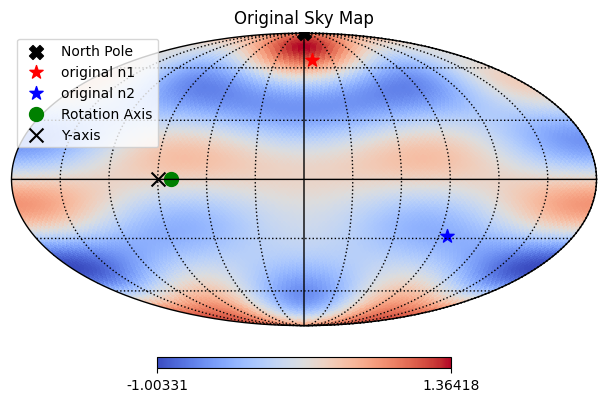

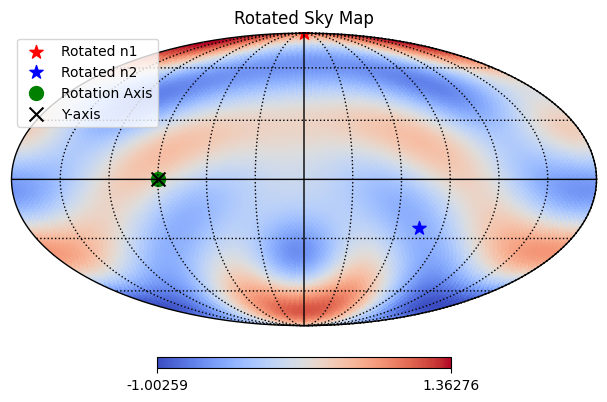

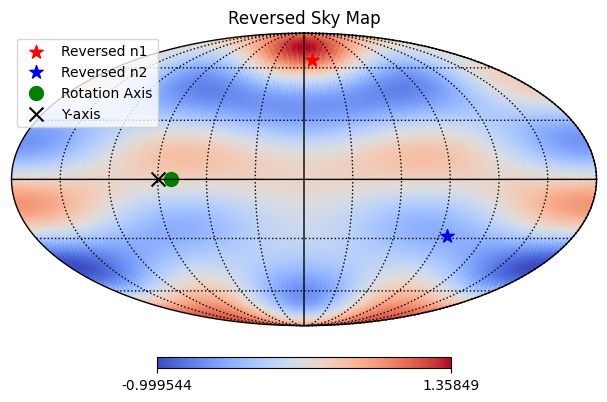

In [173]:
# Plot original and rotated and reversed maps for comparison

# Original map
plt.figure(figsize=(12, 6))
hp.mollview(sky_map, title="Original Sky Map", sub=(1, 2, 1), cmap="coolwarm")
hp.graticule()
hp.projscatter(0, 0, marker='X', color='black', lonlat=False, s=100, label='North Pole')
hp.projscatter(theta1, phi1, marker='*', lonlat=False, color='red', s=100, label='original n1')
hp.projscatter(theta2, phi2, marker='*', lonlat=False, color='blue', s=100, label='original n2')
hp.projscatter(Theta, Phi, marker='o', lonlat=False, color='green', s=100, label='Rotation Axis')
hp.projscatter(np.pi/2, np.pi/2, marker='x', lonlat=False, color='black', s=100, label='Y-axis')
plt.legend()

# Rotated map
plt.figure(figsize=(12, 6))
hp.mollview(rotated_map, title="Rotated Sky Map", sub=(1, 2, 2), cmap="coolwarm")
hp.graticule()
hp.projscatter(theta1_rot, phi1_rot, marker='*', lonlat=False, color='red', s=100, label='Rotated n1')
hp.projscatter(theta2_rot, phi2_rot, marker='*', lonlat=False, color='blue', s=100, label='Rotated n2')
hp.projscatter(Theta_rot, Phi_rot, marker='o', lonlat=False, color='green', s=100, label='Rotation Axis')
hp.projscatter(np.pi/2, np.pi/2, marker='x', lonlat=False, color='black', s=100, label='Y-axis')
plt.legend()
plt.show()

# Reversed map
plt.figure(figsize=(12, 6))
hp.mollview(Reversed_map, title="Reversed Sky Map", sub=(1, 2, 2), cmap="coolwarm")
hp.graticule()
hp.projscatter(Reverse_theta1, Reverse_phi1, marker='*', lonlat=False, color='red', s=100, label='Reversed n1')
hp.projscatter(Reverse_theta2, Reverse_phi2, marker='*', lonlat=False, color='blue', s=100, label='Reversed n2')
hp.projscatter(Reverse_Theta, Reverse__Phi, marker='o', lonlat=False, color='green', s=100, label='Rotation Axis')
hp.projscatter(np.pi/2, np.pi/2, marker='x', lonlat=False, color='black', s=100, label='Y-axis')
plt.legend()
plt.show()

In [174]:
rn1 = hp.ang2pix(nside, theta1_rot, phi1_rot)
rn2 = hp.ang2pix(nside, theta2_rot, phi2_rot)
print(rn1, rn2)

# print angle between original n1 and n2 and the rotated n1 and n2
angle = hp.rotator.angdist((theta1, phi1), (theta2, phi2))
angle_rot = hp.rotator.angdist((theta1_rot, phi1_rot), (theta2_rot, phi2_rot))

print(f"Angle between n1 and n2: {angle[0]:.2f} rad ({np.rad2deg(angle[0]):.2f})")
print(f"Angle between rotated n1 and n2: {angle_rot[0]:.2f} rad ({np.rad2deg(angle_rot[0]):.2f}°)")

2 8741
Angle between n1 and n2: 2.00 rad (114.78)
Angle between rotated n1 and n2: 2.00 rad (114.78°)


In [175]:
# %matplotlib widget

# # Function to convert spherical (theta, phi) to Cartesian (x, y, z)
# def sph_to_cart(theta, phi):
#     x = np.sin(theta) * np.cos(phi)
#     y = np.sin(theta) * np.sin(phi)
#     z = np.cos(theta)
#     return x, y, z

# # Get the map resolution
# nside = hp.npix2nside(len(sky_map))

# # Convert HEALPix pixel indices to angular coordinates
# theta, phi = hp.pix2ang(nside, np.arange(len(sky_map)))

# # Convert to Cartesian coordinates
# x, y, z = sph_to_cart(theta, phi)

# # Convert the rotated map to Cartesian coordinates
# theta_rot, phi_rot = hp.pix2ang(nside, np.arange(len(rotated_map)))
# x_rot, y_rot, z_rot = sph_to_cart(theta_rot, phi_rot)

# # Convert key points to Cartesian
# xn1, yn1, zn1 = sph_to_cart(theta1, phi1)
# xn2, yn2, zn2 = sph_to_cart(theta2, phi2)
# xr, yr, zr = sph_to_cart(Theta, Phi)

# xn1_rot, yn1_rot, zn1_rot = sph_to_cart(theta1_rot, phi1_rot)
# xn2_rot, yn2_rot, zn2_rot = sph_to_cart(theta2_rot, phi2_rot)
# xr_rot, yr_rot, zr_rot = sph_to_cart(Theta_rot, Phi_rot)

# # Create 3D figure
# fig = plt.figure(figsize=(12, 6))

# # Original Sky Map in 3D
# ax1 = fig.add_subplot(121, projection='3d')
# ax1.scatter(x, y, z, c=sky_map, cmap='coolwarm', s=1)
# ax1.scatter(xn1, yn1, zn1, color='red', s=10, label='original n1')
# ax1.scatter(xn2, yn2, zn2, color='blue', s=10, label='original n2')
# ax1.scatter(xr, yr, zr, color='green', s=10, label='Rotation Axis')
# ax1.set_title("Original Sky Map (3D)")
# ax1.legend()

# # Rotated Sky Map in 3D
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.scatter(x_rot, y_rot, z_rot, c=rotated_map, cmap='coolwarm', s=1)
# ax2.scatter(xn1_rot, yn1_rot, zn1_rot, color='red', s=10, label='Rotated n1')
# ax2.scatter(xn2_rot, yn2_rot, zn2_rot, color='blue', s=10, label='Rotated n2')
# ax2.scatter(xr_rot, yr_rot, zr_rot, color='green', s=10, label='Rotation Axis')
# ax2.set_title("Rotated Sky Map (3D)")
# ax2.legend()

# plt.show()


Theta1: 0.44(25.05), Phi1: 6.14(352.06)
Theta2: 2.07(118.63), Phi2: 4.61(264.38)
THETA: 1.57(90.00) , PHI: 1.43(82.06), Omega: -0.44(-25.05)

Rotated Theta1: 0.00000 rad (0.00°), Rotated Phi1: -2.56549 rad (-146.99°)
Rotated theta2: 2.00322 rad (114.78°), Rotated phi2: -1.30895 rad (-75.00°)
Rotated THETA: 1.57(90.00) , Rotated PHI: 1.57(90.00)


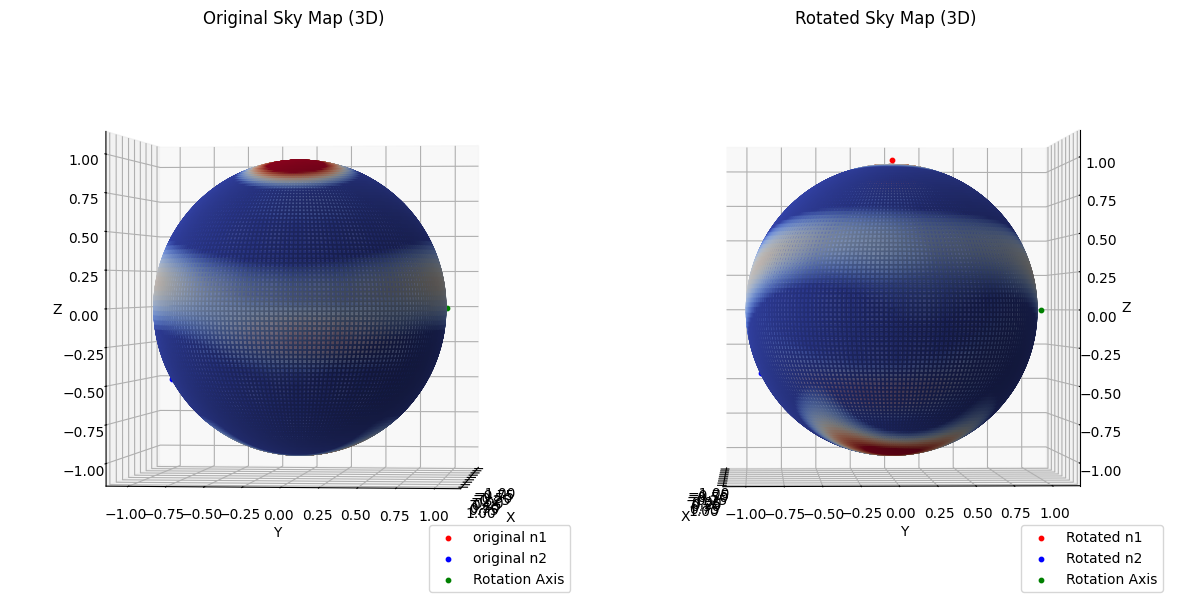

In [176]:
# Function to convert spherical (theta, phi) to Cartesian (x, y, z)
def sph_to_cart(theta, phi, r =1):
    x = r *np.sin(theta) * np.cos(phi)
    y = r*np.sin(theta) * np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z

# Get the map resolution
nside = hp.npix2nside(len(sky_map))

# Create a spherical grid for the map
theta = np.linspace(0, np.pi, 100)  # Latitude
phi = np.linspace(0, 2 * np.pi, 200)  # Longitude
theta, phi = np.meshgrid(theta, phi)

# Convert key points to Cartesian
xn1, yn1, zn1 = sph_to_cart(theta1, phi1, r = 1.03)
xn2, yn2, zn2 = sph_to_cart(theta2, phi2, r = 1.03)
xr, yr, zr = sph_to_cart(Theta, Phi, r = 1.03)

# Convert to Cartesian coordinates
x, y, z = sph_to_cart(theta, phi)

# Interpolate HEALPix values onto the grid
map_values = hp.get_interp_val(sky_map, theta, phi)

# Create figure
fig = plt.figure(figsize=(12, 6))

# Original Sky Map in 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, facecolors=plt.cm.coolwarm(map_values), rstride=1, cstride=1, alpha=0.7)
ax1.scatter(xn1, yn1, zn1, color='red', s=10, label='original n1')
ax1.scatter(xn2, yn2, zn2, color='blue', s=10, label='original n2')
ax1.scatter(xr, yr, zr, color='green', s=10, label='Rotation Axis')
ax1.set_title("Original Sky Map (3D)")
ax1.legend(loc='lower right')
ax1.set_box_aspect([1, 1, 1]) 
ax1.set_zlabel('Z')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.view_init(elev=theta1, azim=phi1)


print(f"Theta1: {theta1:.2f}({np.rad2deg(theta1):.2f}), Phi1: {phi1:.2f}({np.rad2deg(phi1):.2f})")
print(f"Theta2: {theta2:.2f}({np.rad2deg(theta2):.2f}), Phi2: {phi2:.2f}({np.rad2deg(phi2):.2f})")
print(f"THETA: {Theta:.2f}({np.rad2deg(Theta):.2f}) , PHI: {Phi:.2f}({np.rad2deg(Phi):.2f}), Omega: {omega:.2f}({np.rad2deg(omega):.2f})\n")

# Rotated Sky Map in 3D
theta_rot, phi_rot = hp.pix2ang(nside, np.arange(len(rotated_map)))
x_rot, y_rot, z_rot = sph_to_cart(theta_rot, phi_rot)
map_values_rot = hp.get_interp_val(rotated_map, theta, phi)

xn1_rot, yn1_rot, zn1_rot = sph_to_cart(theta1_rot, phi1_rot, r = 1.03)
xn2_rot, yn2_rot, zn2_rot = sph_to_cart(theta2_rot, phi2_rot, r = 1.03)
xr_rot, yr_rot, zr_rot = sph_to_cart(Theta_rot, Phi_rot, r = 1.03)

print(f"Rotated Theta1: {theta1_rot:.5f} rad ({np.rad2deg(theta1_rot):.2f}°), Rotated Phi1: {phi1_rot:.5f} rad ({np.rad2deg(phi1_rot):.2f}°)")
print(f"Rotated theta2: {theta2_rot:.5f} rad ({np.rad2deg(theta2_rot):.2f}°), Rotated phi2: {phi2_rot:.5f} rad ({np.rad2deg(phi2_rot):.2f}°)")
print(f"Rotated THETA: {Theta_rot:.2f}({np.rad2deg(Theta_rot):.2f}) , Rotated PHI: {Phi_rot:.2f}({np.rad2deg(Phi_rot):.2f})")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, facecolors=plt.cm.coolwarm(map_values_rot), rstride=1, cstride=1, alpha=0.7)
ax2.scatter(xn1_rot, yn1_rot, zn1_rot, color='red', s=10, label='Rotated n1')
ax2.scatter(xn2_rot, yn2_rot, zn2_rot, color='blue', s=10, label='Rotated n2')
ax2.scatter(xr_rot, yr_rot, zr_rot, color='green', s=10, label='Rotation Axis')
ax2.set_title("Rotated Sky Map (3D)")
ax2.legend(loc ='lower right')
ax2.set_box_aspect([1, 1, 1])  
ax2.set_zlabel('Z')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.view_init(elev=theta1_rot, azim=phi1_rot)
plt.tight_layout()

plt.show()


In [177]:
%matplotlib inline